In [4]:
pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 31.0 MB/s eta 0:00:00


In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


{'input_ids': tensor([[  101,  3698,  4083,  2003,  1037,  4118,  1997,  2951,  4106,  2008,
          8285, 15416, 17826,  2944,  2311,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
Tokenized Text: ['[CLS]', 'machine', 'learning', 'is', 'a', 'method', 'of', 'data', 'analysis', 'that', 'auto', '##mates', 'analytical', 'model', 'building', '.', '[SEP]']
Total Tokens: 17
Subword Tokens: ['##mates']


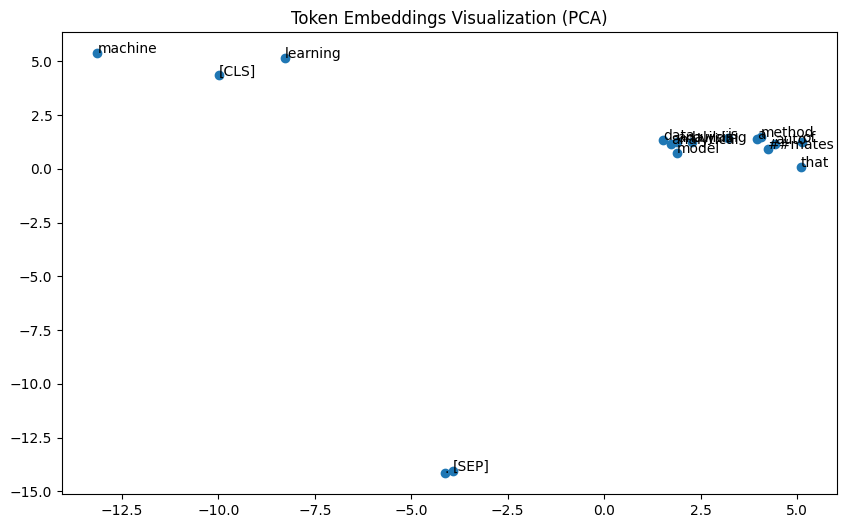

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def process_text(text, model_name="bert-base-uncased"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    # Tokenize text
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    print(tokens)
    tokenized_text = tokenizer.convert_ids_to_tokens(tokens["input_ids"].squeeze().tolist())

    print("Tokenized Text:", tokenized_text)
    print("Total Tokens:", len(tokenized_text))

    # Identify subword tokens
    subwords = [token for token in tokenized_text if token.startswith("##")]
    print("Subword Tokens:", subwords)

    # Extract embeddings
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state.squeeze().numpy()

    # PCA for visualization
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings[:len(tokenized_text)])

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')
    for i, token in enumerate(tokenized_text):
        plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.title("Token Embeddings Visualization (PCA)")
    plt.show()

# Example text
text = "Machine learning is a method of data analysis that automates analytical model building."
process_text(text)


In [3]:
from transformers import pipeline

# Initialize the summarization pipeline using a pre-trained model (e.g., BART or T5)
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example article text (you can replace this with any article content)
article_text = """
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals. Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals. Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem-solving". As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.
"""

# Define the three different types of prompts
generic_prompt = f"Summarize the following article:\n{article_text}"

detailed_prompt = f"Please summarize the following article. Focus on the main ideas, key arguments, and conclusions. Ensure the summary captures the essence of the article without losing important details:\n{article_text}"

specific_prompt = f"Summarize the following article in no more than 150 words. Include the key points, main arguments, and conclusions. Avoid mentioning specific examples or case studies. Do not include any personal opinions or interpretations. Focus purely on the factual information presented in the article:\n{article_text}"

# Function to generate summaries using Hugging Face's pipeline
def generate_summary(text):
    summary = summarizer(text, max_length=150, min_length=50, do_sample=False)
    return summary[0]['summary_text']

# Generate summaries for each prompt
generic_summary = generate_summary(generic_prompt)
detailed_summary = generate_summary(detailed_prompt)
specific_summary = generate_summary(specific_prompt)

# Print the results
print("Generic Prompt Summary:\n", generic_summary)
print("\nDetailed Prompt Summary:\n", detailed_summary)
print("\nSpecific Prompt Summary:\n", specific_summary)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 150, but your input_length is only 149. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)


Generic Prompt Summary:
 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals. Leading AI textbooks define the field as the study of "intelligent agents" As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI.

Detailed Prompt Summary:
 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals. As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.

Specific Prompt Summary:
 Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals. Leading AI textbooks define the field as the study of "intelligent agents" Colloquially, the term "artificial intelligence

In [6]:
import streamlit as st
from transformers import pipeline
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Load LLM from Hugging Face
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

# Load Sentence Transformer model for embeddings
embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", cache_folder="./models")

# Sample FAQ Data (Replace with actual dataset)
faq_data = {
    "What is AI?": "Artificial Intelligence (AI) is the simulation of human intelligence in machines.",
    "How does machine learning work?": "Machine Learning is a subset of AI that allows computers to learn from data without being explicitly programmed.",
    "What is deep learning?": "Deep Learning is a subset of ML that uses neural networks with multiple layers to analyze data.",
    "How does NLP work?": "Natural Language Processing (NLP) allows computers to understand and process human language."
}

# Convert FAQ questions to embeddings
faq_questions = list(faq_data.keys())
faq_embeddings = embedder.encode(faq_questions)

# Build FAISS index for efficient retrieval
index = faiss.IndexFlatL2(faq_embeddings.shape[1])
index.add(np.array(faq_embeddings))

# Streamlit UI
st.title("Mini FAQ Assistant")

# User Input
query = st.text_input("Ask a question:")

if query:
    # Convert query to embedding
    query_embedding = embedder.encode([query])

    # Retrieve the most relevant question from FAQs
    _, top_idx = index.search(np.array(query_embedding), 1)
    best_match_question = faq_questions[top_idx[0][0]]

    # Get answer from pre-defined FAQ
    faq_answer = faq_data[best_match_question]

    # LLM-based refinement
    response = qa_pipeline(question=query, context=faq_answer)

    # Display Results
    st.subheader("Best Matched FAQ Answer:")
    st.write(f"**{best_match_question}** → {faq_answer}")

    st.subheader("AI-Generated Answer:")
    st.write(response['answer'])


Device set to use cpu


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-03-12 18:53:18.265 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:53:18.465 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-12 18:53:18.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:53:18.472 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:53:18.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:53:18.478 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:53:18.482 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:53:18.484 Session state does not 

In [1]:
from transformers import pipeline

# Load the model (Hugging Face)
qa_pipeline = pipeline("text-generation", model="facebook/opt-1.3b")

# Define the task
question = "How does a Convolutional Neural Network (CNN) work?"

# Standard Prompting
prompt_standard = f"Explain: {question}"
output_standard = qa_pipeline(prompt_standard, max_length=100)[0]['generated_text']

# Chain of Thought Prompting
prompt_cot = f"Let's break it down step by step. {question} First, explain what a convolutional layer does. Then, explain pooling layers. Finally, describe how CNNs learn features."
output_cot = qa_pipeline(prompt_cot, max_length=150)[0]['generated_text']

# Few-Shot Learning (Providing Examples)
prompt_few_shot = """Example 1:
Q: What is Reinforcement Learning?
A: Reinforcement Learning is a type of ML where an agent learns by interacting with its environment and receiving rewards.

Example 2:
Q: How does a Convolutional Neural Network (CNN) work?
A:"""
output_few_shot = qa_pipeline(prompt_few_shot, max_length=150)[0]['generated_text']

# Role Play
prompt_role_play = f"You are a professor of Deep Learning. Explain the following concept in detail: {question}"
output_role_play = qa_pipeline(prompt_role_play, max_length=150)[0]['generated_text']

print("\n=== Standard Prompting ===\n", output_standard)
print("\n=== Chain of Thought ===\n", output_cot)
print("\n=== Few-Shot Learning ===\n", output_few_shot)
print("\n=== Role Play ===\n", output_role_play)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



=== Standard Prompting ===
 Explain: How does a Convolutional Neural Network (CNN) work?

A Convolutional Neural Network (CNN) is a type of artificial neural network that is trained to recognize patterns in images. The network is trained to recognize patterns in images by feeding it a large number of images and then training it to recognize patterns in the images.

The network is trained to recognize patterns in images by feeding it a large number of images and then training it to recognize patterns in the

=== Chain of Thought ===
 Let's break it down step by step. How does a Convolutional Neural Network (CNN) work? First, explain what a convolutional layer does. Then, explain pooling layers. Finally, describe how CNNs learn features.

What is a Convolutional Neural Network?

A convolutional neural network (CNN) is a type of neural network that uses convolutional layers to learn features. Convolutional layers are used to combine the output of multiple layers to form a single output.
